# 왜 배워야하는가...
1. 기업의 요구(tensorflow, pytorch)

2. 자유도
    - pytorch 직접 만져보면서 공부하는데 도움이됨

# 텐서

- 텐서라는 타입이 있다

- 파이토치는 텐서로 시작해서 텐서로 끝남

- 텐서를 잘 다룰 수 있어야 신경망에서 데이터 입력과 출력으 제어할 수 있음

In [1]:
import torch # pip install torch torchvision

## 텐서 생성 및 변환

- 텐서는 파이토치의 가장 기본이 되는 데이터 구조

- numpy의 다차원 배열과 비슷하며 GPU 에서도 연산 가능

In [2]:
# 2차원 텐서 생성
torch.tensor(([1,2],[3,4]))

tensor([[1, 2],
        [3, 4]])

In [ ]:
# shape 맞춰줘!!!!!!!!!!!!!!!!
# 이렇게 쓰면안됨
torch.tensor(([1,2],[3,4,5]))

In [ ]:
# gpu 가 있다면
torch.tensor(([1,2],[3,4]), device = "cuda:0")
# 그래픽 카드에서 tensor 를 만들어줌

In [3]:
# dtype을 이용하여 텐서 생성
torch.tensor(([1,2],[3,4]), dtype = torch.float64)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

### 텐서를 ndarray 로 변환

- tensor 타입

In [6]:
temp = torch.tensor([[1,2],[3,4]])
temp

tensor([[1, 2],
        [3, 4]])

- 넘파이 타입

In [7]:
# 텐서를 ndarray 로 변환
temp.numpy()

array([[1, 2],
       [3, 4]])

**그래픽카드 다차원 배열에서는 넘파이 변환이 안된다~~~~**

In [ ]:
torch.tensor(([1,2],[3,4]), device = "cuda:0").numpy()

**이렇게 바꾸세요**

In [ ]:
# gpu 가있다면
gpu_tensor = torch.tensor(([1,2],[3,4]), device = "cuda:0")
gpu_tensor.to("cpu").numpy()

## 텐서의 인덱스 조직

- 텐서는 넘파이의 다차원 배열과 유사하게 동작하기 때문에 배열처럼 인덱스를 바로 지정하거나 슬라이싱 등을 상요할 수있음

In [8]:
# 파이토치로 1차원 벡터 생성
temp = torch.FloatTensor([1,2,3,4,5,6,7])
temp

tensor([1., 2., 3., 4., 5., 6., 7.])

In [9]:
# 인덱스로 접근
temp[0],temp[1],temp[2]

(tensor(1.), tensor(2.), tensor(3.))

In [10]:
# 슬라이스로 접근
temp[2:5]

tensor([3., 4., 5.])

## 텐서 연산

- 텐서는 넘파이의 다차원 배열처럼 다양한 수학 연산이 가능하며, gpu를 사용하면 더 빠르게 연산 할 수 있음

- 단, 텐서 간의 타입이 다르면 연산이 불가
    - 예) FloatTensor(32비트 부동 소수점)과 DoubleTensor(64비트의 부동 소수점) 간에 사칙 연산을 수행하면 오류 발생

In [11]:
# 길이가 3인 벡터 생성
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])

In [12]:
# 길이가 같은 벡터 간 뺄셈 연산

In [13]:
print(w - v)

tensor([2, 2, 3])


## 텐서의 차원 조작

- 텐서의 차원을 변경하는 명령어
    - view : 넘파이의 reshape와 유사
    - cat : 달느 길이의 텐서를 하나로 병합
    - transpose : 행렬의 전치 또는 차원의 순서 변경

In [14]:
# 2 * 2 행렬 생성
temp = torch.tensor([
    [1,2],
    [3,4]
])

In [15]:
temp.shape

torch.Size([2, 2])

In [16]:
temp

tensor([[1, 2],
        [3, 4]])

In [17]:
# 2 * 2 행렬을 4 * 1 로 변경
temp.view(4,1)

tensor([[1],
        [2],
        [3],
        [4]])

In [18]:
temp # 실제 데이터가 변경되는 것은 아니다

tensor([[1, 2],
        [3, 4]])

In [22]:
# 1차원 배열로 변경
temp.view(-1) # 유추해보거라~

tensor([1, 2, 3, 4])

- -1 은 다른 차원으로 부터 해당 값을 유추하겠다는 뜻

In [23]:
temp.view(1, -1)

tensor([[1, 2, 3, 4]])

In [24]:
temp.view(-1,1)

tensor([[1],
        [2],
        [3],
        [4]])

# 데이터로더

<img src="./image/dataloader.jpg">

- torch.utils.data.DataLoader 는 학습에 사용될 데이터 전체를 보관했다가 모델 학습을 할 때 배치 크기 만큼 데이터를 꺼내서 사용

- 주의할 점을 미리 데이터를 잘라 놓는 것이 아니라 내부적으로 이터레이터에 포함된 인덱스를 이용하여 배치 크기만큼 데이터를 반환

# 파이토치 데이터셋 사용

- **torchvision**은 파이토치에서 제공하는 데이터셋이 모여있는 패키지

- 파이토치 데이터 셋을 다운로드 받으려면 requests 라이브러리 설치가 필요
    - HTTP 요청을 하기 위함

In [25]:
import torchvision.transforms as transforms # 전처리역할
from torchvision.datasets import MNIST

In [26]:
# 평균이 0.5, 표준편차가 1.0이 되도록 데이터의 분포를 정규화
mnist_transform = transforms.Compose([
    transforms.ToTensor(), # 텐서타입으로 바꿔줘라~~
    transforms.Normalize((0.5,), (1.0,)) # 정규화 해줘라~~
])

In [27]:
# 다운받을 경로 입력
data_path = "./data/MNIST_DATASET"

train_dataset = MNIST(data_path, 
                      transform = mnist_transform, # 전처리 파이프라인 넣기
                      train = True, # train 데이터 인지 설정
                      download=True)
test_dataset = MNIST(data_path, transform = mnist_transform, train = False, download=True)

100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:02<00:00, 4.13MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 154kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.21MB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 2.67MB/s]


- 404 에러가 뜬다~?
- https://his2070.tistory.com/5 이곳을 참고하여 해결방법을 사용해보자

In [29]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/MNIST_DATASET
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           )

# 모델 정의

- 파이토치에서 모델을 정의하기 위해서는 module 을 상속한 클래스를 사용
    - layer : 모듈 또는 모듈을 구성하는 한 개의 계층
    - 예) 합성곱층, 선형계층

- module : 한 개 이상의 계층이 모여서 구성된 것, 모듈이 모여 새로운 모듈을 만들 수 도 있음

## nn.Module 을 상속하여 정의하는 방법

- 파이토치에서 nn.Module 을 상속받는 모델은 기본적으로 \_\_init__() 과 forword() 함수를 포함

- \_\_init__() 에서는 모델에서 사용될 모듈을 활성화 함수 등을 정의

- forword() 함수에서는 모델에서 시행되어야 하는 연산을 정의 ~순전파~~~~~~!!!~!!~~~!!~!~~~!~!~~!~!~!~!!!!

- nn.Sequential 을 사용하면 \_\_init__() 에서 사용할 네트워크 모델들을 정의해줄 뿐만 아니라 forword() 함수 모델에 실행되어야 할 계산을 좀 더 가독성이 뛰어나게 코드로 작성할 수 있음

- 또한, Sequential 객체에서는 그 안에 포함된 각 모듈을 순차적으로 실행해 줌

In [28]:
import torch.nn as nn # 신경망이 모여있음

In [41]:
class MLP(nn.Module):
    def __init__(self):
        # super(MLP, self).__init_()  # 파이썬2의 잔재(곰팡내남, 폐렴걸릴것같음)
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, # 1개의 채널
                out_channels= 64, # 64개의 필터
                kernel_size=5 # 도장 5
            ),
            nn.ReLU(inplace= True),
            # inplace= True :: input 으로 들어온 값 자체를 수정(재활용불가)
            # 메모리 효율이 좋아지지만 input 값이 사라짐
            nn.MaxPool2d(2), 
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=  64, out_channels= 32, kernel_size = 5),
            nn.ReLU(inplace= True),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            # in_features 은 실제로 계산해서 넣어야합니다.
            nn.Linear(in_features= 512, out_features = 10, bias = True),
            nn.ReLU(inplace = True)
        )
    # 레이어를 만들었으면 이제 순전파 해야함! (자동으로 실행함~~ )
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)

        # 출력층과 연결 시켜주기 위해서 차원 변경 (flatten 과 동일)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)

        return x # 최종적인 예측값

In [42]:
# 모델 객체 생성
model = MLP()

In [43]:
# 같은 수준의 하위 노드를 반환
list(model.children())

[Sequential(
   (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
   (1): ReLU(inplace=True)
   (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 ),
 Sequential(
   (0): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
   (1): ReLU(inplace=True)
   (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 ),
 Sequential(
   (0): Linear(in_features=512, out_features=10, bias=True)
   (1): ReLU(inplace=True)
 )]

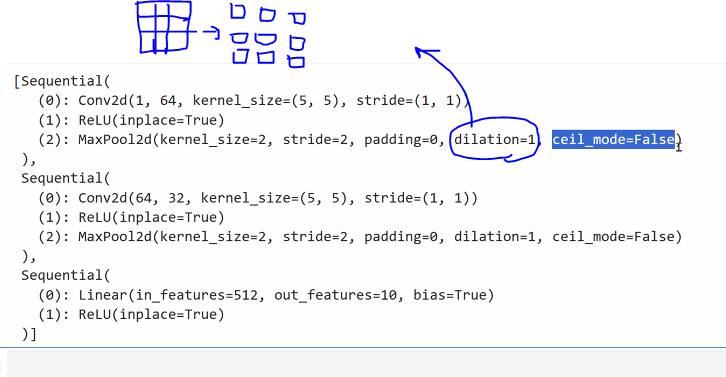

In [44]:
# 모델의 네트워크에 대한 모든 노드를 반환
list(model.modules())

[MLP(
   (layer1): Sequential(
     (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
     (1): ReLU(inplace=True)
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (layer2): Sequential(
     (0): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
     (1): ReLU(inplace=True)
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (layer3): Sequential(
     (0): Linear(in_features=512, out_features=10, bias=True)
     (1): ReLU(inplace=True)
   )
 ),
 Sequential(
   (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
   (1): ReLU(inplace=True)
   (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 ),
 Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1)),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Sequential(
   (0): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
   (1): ReLU(inplace=True)
   (2): MaxPool2d(kernel_size=2

### 함수로 신경망 정의(보통 함수 안씀)

In [46]:
def MLP(in_features = 1, hidden_features = 20, out_features = 1):
    # 생성자 역할 ------------------------------------
    hidden = nn.Linear(in_features=in_features, out_features= hidden_features, bias = True)
    activation = nn.ReLU()
    output = nn.Linear(in_features = hidden_features, out_features = out_features, bias=True)
    # 생성자 역할 ------------------------------------

    # 모델 만듬용
    net = nn.Sequential(hidden, activation, output)
    return net

# 모델 파라미터 정의

- 손실 함수 (loss function)
    - 학습 하는 동안 출력과 실제 값(정답) 사이의 오차를 측정
    - wx + b 를 계산한 값과 실제 값 y 의 오차를 구해서 모델의 정확성을 측정
    - 자주 사용되는 손실함수
        - BCELoss : 이진 분류를 위해 사용
        - CrossEntropyLoss : 다중 클래스 분류를 위해 사용
        - MSELoss : 회귀 모델에서 사용
- 옵티마이저(optimizer)
    - 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
    - 옵티마이저의 주요 특성
        - optimizer 는 step() 메서드를 통해 전달받은 파라미터를 업데이트
        - 모델의 파라미터별로 다른 기준을 적용시킬 수 있음
        - torch.optim.Optimizer(params, defaults)는 모든 옵티마이저의 기본이 되는 클래스
        - zero_grad() 메서드는 옵티마이저에 사용된 파라미터들의 기울기를 0으로 초기화 : **이거 안쓰면 기울기가 누적됨**
        - zero_grad() 이거 자동화하면 안됨??? : 아쉽게도 누적시켜서 쓰는 기법이 있음....ㅠ 진짜 개 많은!!!!! 기법!!!!!!
        - torch.optim.lr_scheduler 는 에포크에 따라 학습률을 조절 할 수 있음
          
- 학습률 스케줄러 (learning rate scheduler) => **성능보다 속도를 선택한 쪽**
    - 미리 지정한 횟수의 에포크를 지날 때마다 학습률을 감소시킴
 
    - 학습률 스케줄러를 이용하면 학습 초기에는 빠른 학습을 진행하다가 **전역 최소점(global minimum)**전 근처에 다다르면 학습률을 줄여서 최적점을 찾아갈 수 있도록 함
 
- 지표(metrics)
    - 훈련과 테스트 단계를 모니터링

## 전역 최소점과 최적점

<!-- <img src="./image/minimum.jpg"> -->
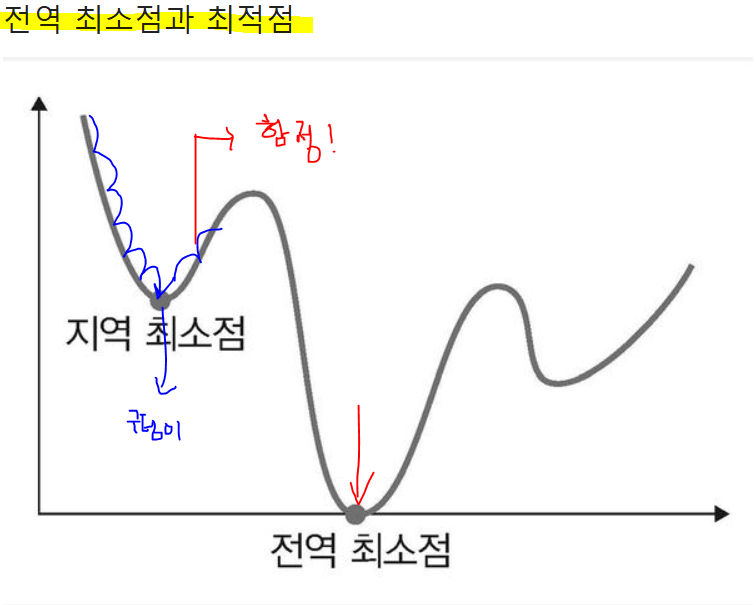

- 일부로 **편차를 크게** 할려고 경사 하강법 안쓰고 미니 배치 하강법 씀

- 손실 함수는 실제 값과 예측값 차이를 수치화해 주는 함수

- 이 오차 값이 클수록 손실 함수의 값이 크고, 오차 값이 작을 수록 손실 함수의 값이 작아짐

- 손실 함수의 값을 최소화하는 가중치와 바이어스를 찾는 것이 모델 학습의 목표

- 전역 최소점은 오차가 가장 작을 때의 값을 의미하므로 우리가 최종적으로 찾고자 하는것

- 지역 최소점(local minimum) 은 전역 최소점을 찾아가는 과정에서 만나는 홀(hole)과 같은 것으로 옵티마이저가 지역 최소점에서 학습을 멈추면 최솟값을 찾는 오차를 찾을 수 없는 문제가 발생

# 모델 훈련

- 모델을 학습시킨다는 것은 y = wx + b 라는 함수에서 w와 b의 적절한 값을 찾는다는 의미

- w와 b에 임의의 값을 적용하여 시작하며 오차가 줄어들어 전역 최소점에 이를 때까지 파라미터(w,b)를 계속 수정

- 딥러닝 학습 절차
    1. 모델, 손실 함수, 옵티마이저 정의
    2. 전방향 학습(입력 => 출력 계산)
    3. 손실 함수로 출력과 정답의 차이(오차)계산
    4. 역전파 학습(기울기 계산)
    5. 기울기 업데이트
- 파이토치 학습 절차

    1. 모델, 손실 함수, 옵티마이저 정의
         - optimizer.zero_grad() : 기울기 초기화
         - 파이토치는 기울기 값을 계사하기 위해 loss.backward() 메서드를 이용하는데 , 이 때 새로운 기울기 값이 이전 기울기 값에 누적하여 곗나된
         - 기울기 누적은 누적계산이 필요하지 않는 모델에서는 불필요함
         - 따라서 기울기 누적 계산이 필요하지 않을 때는 입력 값을 모델에 적용하기 전에 초기화 해야함
    2. output = model(input) : 출력 계산
        - 자동으로 forward 발싸
    3. loss = loss_fn(output, target) : 오차 계산

    4. loss.backward() : 역전파 학습
    5. optimizer.step() : 기울기 업데이트